# Control using Smith Predictor

In [1]:
using Interact, Plots
using ControlSystems

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-16524969845861882380\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-16015699797729931015\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-16524969845861882380\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

### Helper functions for constructing simple feedback or Smith Predictor controlled systems

In [3]:
# create a sample system with given continuous-time poles & its delayed
function createFeedbackSystem(P, G, τ)
    return feedback(P*delay(τ)*G, 1)
end
function createSmithPredictorSystem(P, G, τ, τbar)
    GSP = feedback(G, -P*delay(τbar)+P)
    return feedback(P*delay(τ)*GSP, 1)
end;

### Defining the nominal plant and controllers

In [5]:
# Define a sample plant (P) and controller (G)
s = tf("s")
P = ss(1/s^2)
G = ss(1.0 + 1.4*s/(0.1*s+1))

# compute nominal closed-loop system (without delay) 
clSys = feedback(P*G,1);

## Performance of simple feedback control on delayed system

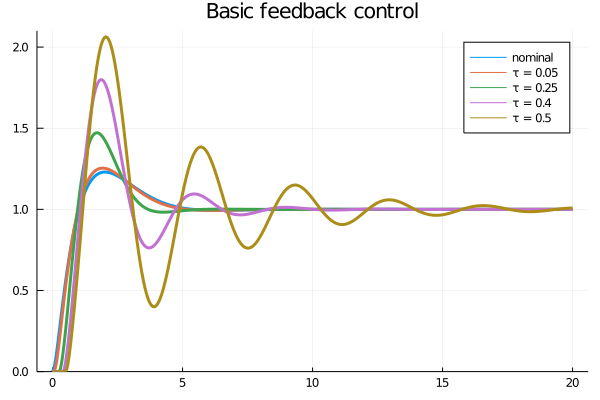

In [7]:
# Plotting parameters
τ = [0.05; 0.25; 0.4; 0.5]  # Vector of time delays to plot altogether
T = 20.0                    # time horizon

# Plot performance without delay
p = plot(size=(600, 400), ylims = (0.0, 2.1), title = "Basic feedback control")
y_nom, t_nom, _ = step(clSys, T);
plot!(p, t_nom, y_nom, linewidth=3, label="nominal")
# Plot performances with delays
for i = 1:length(τ)
    clSysDelayed = createFeedbackSystem(P, G, τ[i])
    y, t, _ = step(clSysDelayed, T)
    plot!(p, t, y, linewidth=3, label="τ = $(τ[i])")
end
display(p)

## Performance of Smith Predictor

The smith predictor is able to recover nominal performance - if the delay $\tau$ is known.


What happens if the estimate of $\tau$ is larger or smaller than the true delay?

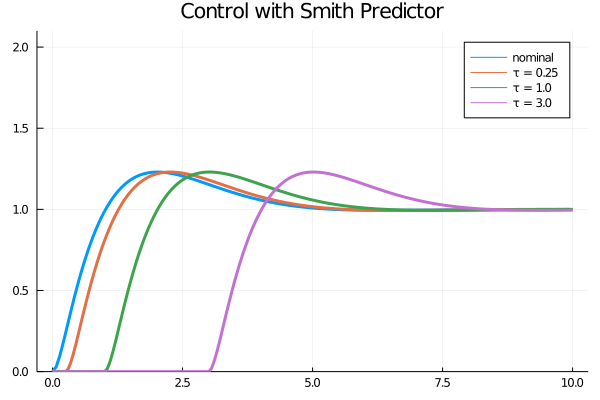

In [15]:
# Plotting parameters
τ = [0.25; 1.0; 3.0]  # Vector of time delays to plot altogether
T = 10.0              # time horizon

# Plot performance without delay
p = plot(size=(600, 400), ylims = (0.0, 2.1), title="Control with Smith Predictor")
y_nom, t_nom, _ = step(clSys, T);
plot!(p, t_nom, y_nom, linewidth=3, label="nominal")
# Plot performances with delays
for i = 1:length(τ)
    τ_estimate = τ[i]
    clSysSmith = createSmithPredictorSystem(P, G, τ[i], τ_estimate)
    y, t, _ = step(clSysSmith, T)
    plot!(p, t, y, linewidth=3, label="τ = $(τ[i])")
end
display(p)